In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from IPython.display import display_html

In [2]:
data = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

In [3]:
data

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [4]:
region = pd.DataFrame(data['State'].value_counts())
region

,State
TX,1225
FL,888
CA,668
IL,593
NY,440
GA,392
AZ,344
VA,340
NJ,337
OH,329


<AxesSubplot:>

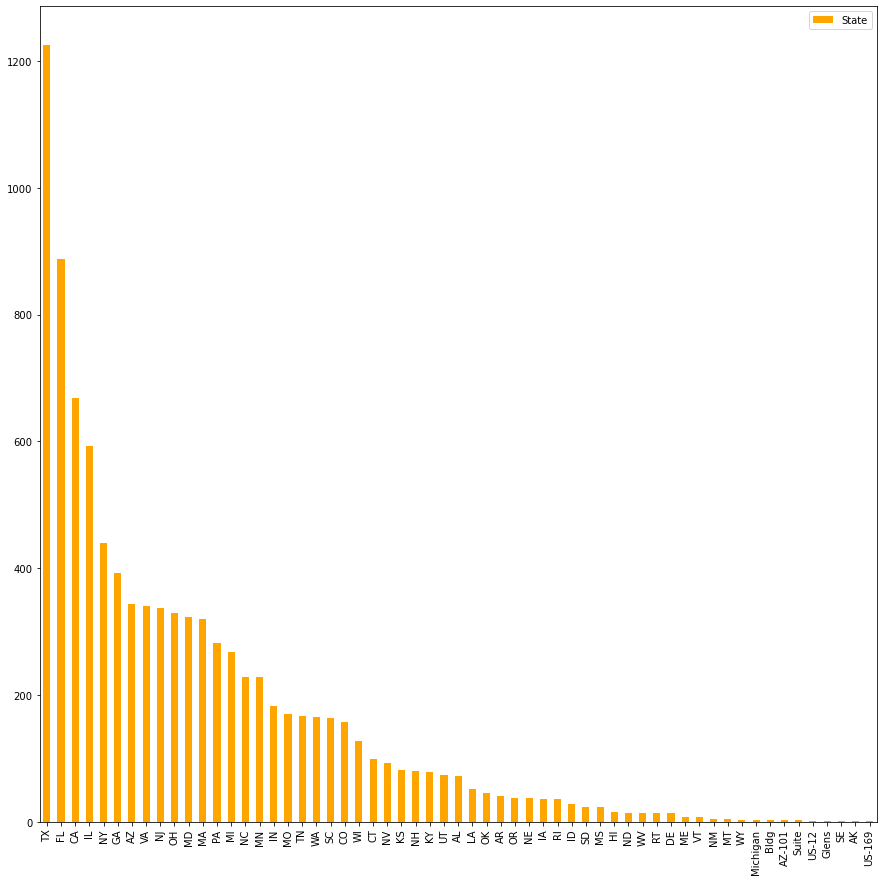

In [5]:
region.plot.bar(color = 'orange',figsize = (15,15))

In [6]:
TX = data.loc[(data['State'] == "TX"), ['Year','SellerType','Make','Model','Used/New','Price']]
TX

,Year,SellerType,Make,Model,Used/New,Price
30,2019,Dealer,Honda,Odyssey EX-L,Used,"$38,347"
31,2016,Private,Honda,Odyssey EX-L,Used,"$28,999"
32,2020,Dealer,Mercedes-Benz,GLC 300 Base,Used,"$43,451"
33,2019,Dealer,Audi,Q5 2.0T Premium,Used,"$37,300"
34,2014,Dealer,BMW,428 i,Used,"$27,741"
...,...,...,...,...,...,...
9301,2017,Dealer,Chevrolet,Cruze LT,Used,"$16,912"
9304,2021,Dealer,Mercedes-Benz,E-Class E 350,Mercedes-Benz Certified,"$55,771"
9305,2015,Dealer,Chrysler,200 Limited,Used,"$4,250"
9306,2020,Dealer,Mercedes-Benz,A-Class A 220,Used,"$34,320"
